## Copy files from github

In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 192, done.
remote: Counting objects: 100% (192/192), done.
remote: Compressing objects: 100% (147/147), done.
remote: Total 1724 (delta 86), reused 140 (delta 44), pack-reused 1532
Receiving objects: 100% (1724/1724), 6.94 MiB | 5.00 MiB/s, done.
Resolving deltas: 100% (1117/1117), done.


## Download coco128 dataset for retrain demo

In [4]:
! python -c "from yolov5.utils.google_utils import gdrive_download; gdrive_download('1n_oKgR81BJtqk75b00eAjdv03qVCQn2f','coco128.zip')"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   279    0   279    0     0   1594      0 --:--:-- --:--:-- --:--:--  1594
100   408    0   408    0     0    585      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 21.0M    0 21.0M    0     0  14.2M      0 --:--:--  0:00:01 --:--:--  235M


In [1]:
%cd yolov5
%pwd

/content/yolov5


'/content/yolov5'

## Install requirements.txt

In [ ]:
!pip install -U -r requirements.txt

## Use yolov5 to predict images or videos

In [2]:
!python detect.py

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='inference/images', update=False, view_img=False, weights='yolov5s.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   279    0   279    0     0   1594      0 --:--:-- --:--:-- --:--:--  1603
100   408    0   408    0     0    636      0 --:--:-- --:--:-- --:--:--   636
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 14.4M    0 14.4M    0     0  8907k      0 --:--:--  0:00:01 --:--:-- 8907k
Fusing layers... Model Summary: 140 layers, 7.45958e+06 parameters, 7.45958e+06 gradients
image 1/2 /content/yolov5/i

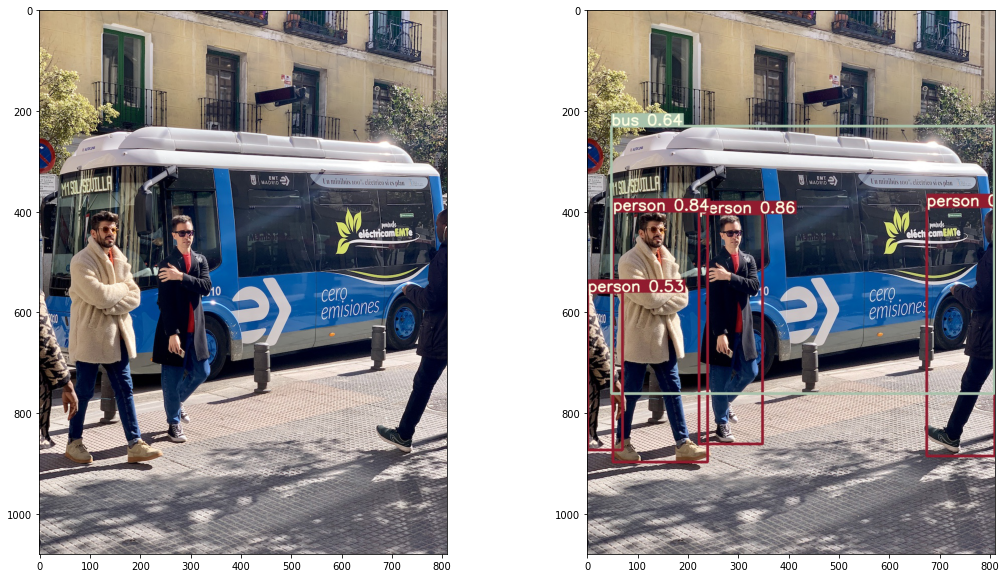

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
#show the images
plt.figure(figsize=(18, 10))

img = Image.open('inference/images/bus.jpg')
plt.subplot(1, 2, 1)
plt.imshow(img)

img = Image.open('inference/output/bus.jpg')
plt.subplot(1, 2, 2)
plt.imshow(img)

## Train with your own dataset
- note that label files are in "labels" folder
- each image has one label txt file
- yolov5s.yaml is the small model, you can choose others

In [17]:
!python train.py --img 640 --batch 16 --epochs 20 --data ./data/coco128.yaml --cfg ./models/yolov5s.yaml --weights ''

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(batch_size=16, bucket='', cache_images=False, cfg='./models/yolov5s.yaml', data='./data/coco128.yaml', device='', epochs=20, evolve=False, hyp='', img_size=[640], multi_scale=False, name='', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-07-17 03:10:46.517041: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Hyperparameters {'optimizer': 'SGD', 'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0

## Test the trained model

In [18]:
!python detect.py --weights runs/exp0/weights/last.pt --img 640 --conf 0.4 --source inference/images

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='inference/images', update=False, view_img=False, weights=['runs/exp0/weights/last.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Fusing layers... Model Summary: 140 layers, 7.45958e+06 parameters, 6.61683e+06 gradients
image 1/4 /content/yolov5/inference/images/000000000034.jpg: 448x640 Done. (0.011s)
image 2/4 /content/yolov5/inference/images/000000000064.jpg: 640x512 Done. (0.011s)
image 3/4 /content/yolov5/inference/images/bus.jpg: 640x512 Done. (0.010s)
image 4/4 /content/yolov5/inference/images/zidane.jpg: 384x640 Done. (0.012s)
Results saved to /content/yolov5/inference/output
Done. (0.167s)


In [ ]:
#show the images
plt.figure(figsize=(18, 10))

img = Image.open('inference/images/000000000034.jpg')
plt.subplot(1, 2, 1)
plt.imshow(img)

img = Image.open('inference/output/000000000034.jpg')
plt.subplot(1, 2, 2)
plt.imshow(img)

Reference: https://github.com/ultralytics/yolov5